In [3]:
# importing some of the necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [4]:
# loading the data into a Data Frame
soil_df = pd.read_csv('soil_measures.csv')

# going through some EDA
print(soil_df.head())
print(soil_df.info())
print("\n\n", soil_df.describe().round(2))

    N   P   K        ph  crop
0  90  42  43  6.502985  rice
1  85  58  41  7.038096  rice
2  60  55  44  7.840207  rice
3  74  35  40  6.980401  rice
4  78  42  42  7.628473  rice
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   N       2200 non-null   int64  
 1   P       2200 non-null   int64  
 2   K       2200 non-null   int64  
 3   ph      2200 non-null   float64
 4   crop    2200 non-null   object 
dtypes: float64(1), int64(3), object(1)
memory usage: 86.1+ KB
None


              N        P        K       ph
count  2200.00  2200.00  2200.00  2200.00
mean     50.55    53.36    48.15     6.47
std      36.92    32.99    50.65     0.77
min       0.00     5.00     5.00     3.50
25%      21.00    28.00    20.00     5.97
50%      37.00    51.00    32.00     6.43
75%      84.25    68.00    49.00     6.92
max     140.00   145.00   205.00     9.94


In [5]:
# check for missing data
print(soil_df.isnull().sum())

N       0
P       0
K       0
ph      0
crop    0
dtype: int64


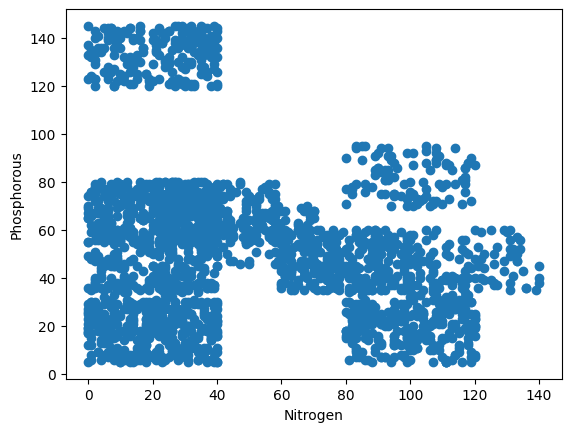

In [6]:
# visualize the data
plt.scatter(soil_df['N'], soil_df['P'])
plt.xlabel('Nitrogen')
plt.ylabel('Phosphorous')
plt.show()

Text(0.5, 1.0, 'pairplot based on the featues')

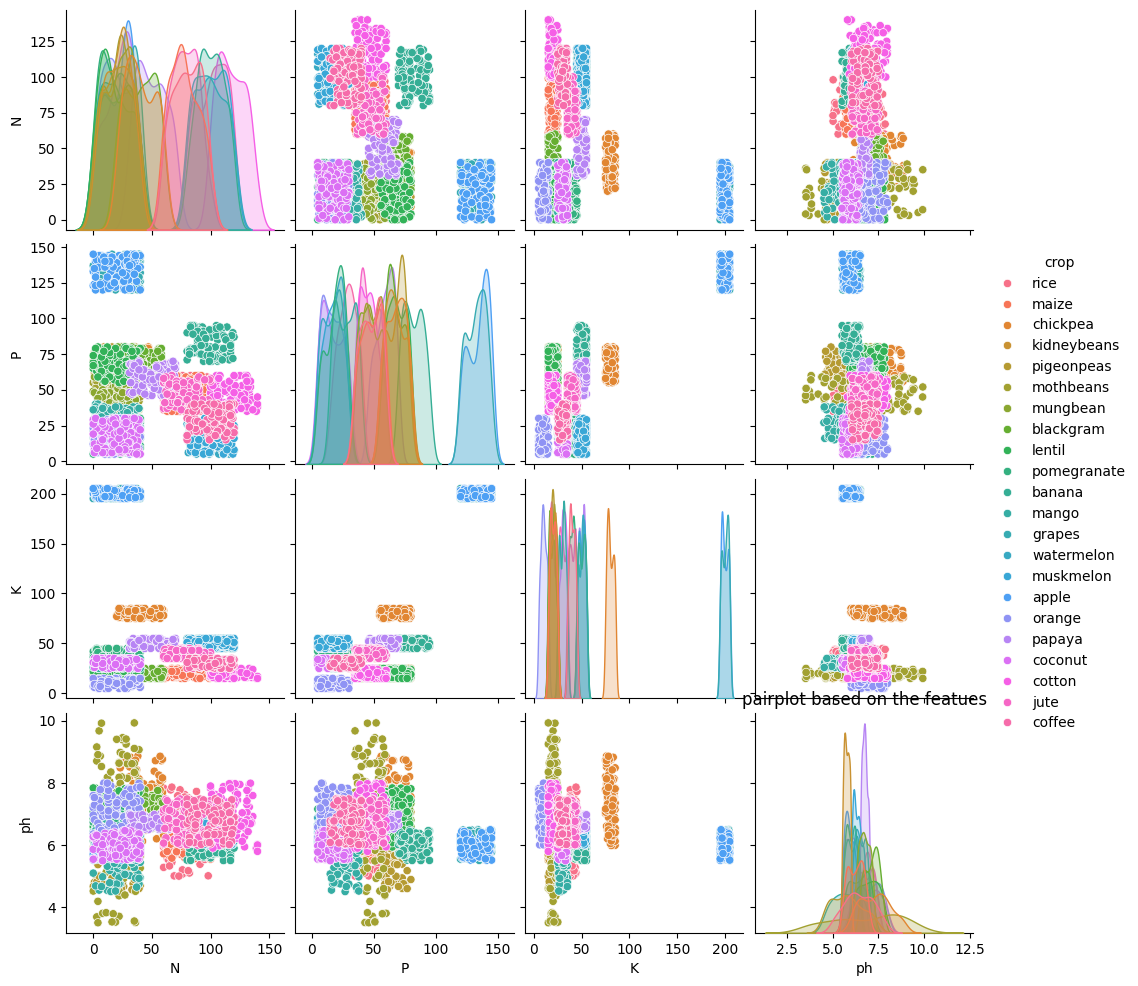

In [7]:
#Create a pair plot
sns.pairplot(soil_df, hue= "crop")
plt.title("pairplot based on the featues")

     Nutrient      Value
0           N  90.000000
1           N  85.000000
2           N  60.000000
3           N  74.000000
4           N  78.000000
...       ...        ...
8795       ph   6.780064
8796       ph   6.086922
8797       ph   6.362608
8798       ph   6.758793
8799       ph   6.779833

[8800 rows x 2 columns]


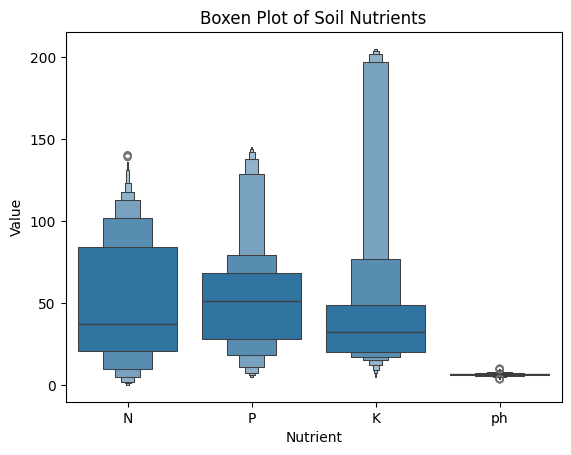

In [8]:
 # Assuming soil_df is your DataFrame and it has columns 'N', 'P', 'K', and 'ph'
# Melt the DataFrame to long-form or tidy-form
Nutrients_melted = soil_df.melt(value_vars=['N', 'P', 'K', 'ph'], var_name='Nutrient', value_name='Value')
print(Nutrients_melted)

# Create a boxen plot
sns.boxenplot(x='Nutrient', y='Value', data=Nutrients_melted)

# Add title and labels
plt.title('Boxen Plot of Soil Nutrients')
plt.xlabel('Nutrient')
plt.ylabel('Value')

# Show the plot
plt.show()

In [9]:
# import the label incoder
from sklearn.preprocessing import LabelEncoder

# Split the data into label and features
X = soil_df.drop('crop', axis=1)
y = soil_df['crop']
le = LabelEncoder()

y = le.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Print the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (1760, 4)
X_test shape: (440, 4)
y_train shape: (1760,)
y_test shape: (440,)


In [12]:
# import the necessary packages
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score 
import warnings
from sklearn.preprocessing import StandardScaler

warnings.filterwarnings("ignore")

# Standardize features for Logistic Regression and XGBoost
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# runing the multinomial model to predict the data
# use metrics to evaluate the model
features_dict = {}
for feature in ['N', 'P', 'K', 'ph']:
    logreg = LogisticRegression(multi_class='multinomial', max_iter=1000)
    logreg.fit(X_train[[feature]], y_train)
    y_pred = logreg.predict(X_test[[feature]])
    feature_performance = f1_score(y_test, y_pred, average='weighted').round(3)
    features_dict[feature] = feature_performance
    print(feature_performance)

best_feature = max(features_dict, key=features_dict.get)
best_score = features_dict[best_feature]

# Store the best predictive feature in a dictionary
best_predictive_feature = {best_feature: best_score}

# Print the best predictive feature and its score
print(f"Best predictive feature: {best_predictive_feature}")

0.114
0.169
0.294
0.075
Best predictive feature: {'K': np.float64(0.294)}


Random Forest Performance:
              precision    recall  f1-score   support

           0       0.46      0.55      0.50        20
           1       1.00      1.00      1.00        20
           2       0.60      0.75      0.67        20
           3       1.00      1.00      1.00        20
           4       0.73      0.80      0.76        20
           5       1.00      0.95      0.97        20
           6       1.00      1.00      1.00        20
           7       0.44      0.35      0.39        20
           8       0.61      0.70      0.65        20
           9       0.81      0.85      0.83        20
          10       0.42      0.40      0.41        20
          11       0.91      1.00      0.95        20
          12       0.72      0.65      0.68        20
          13       0.90      0.90      0.90        20
          14       0.84      0.80      0.82        20
          15       0.38      0.30      0.33        20
          16       1.00      1.00      1.00        20


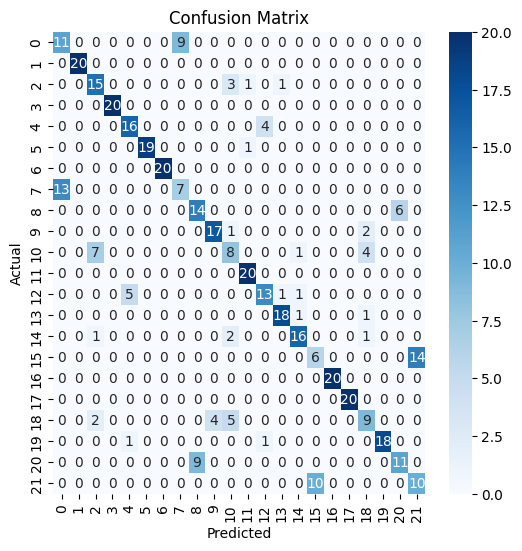

In [23]:
# Import necessary libraries
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score, f1_score, confusion_matrix

# Initialize a results dictionary
results = {}

# 1. Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_f1 = f1_score(y_test, rf_pred, average="weighted")
results['Random Forest'] = rf_f1

print("Random Forest Performance:")
print(classification_report(y_test, rf_pred))
print("F1 Score:", rf_f1)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [24]:
# 2. XGBoost
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric="logloss")
xgb.fit(X_train_scaled, y_train)
xgb_pred = xgb.predict(X_test_scaled)
xgb_f1 = f1_score(y_test, xgb_pred, average="weighted")
results['XGBoost'] = xgb_f1

print("\nXGBoost Performance:")
print(classification_report(y_test, xgb_pred))
print("F1 Score:", xgb_f1)
print("Confusion Matrix:")
print(confusion_matrix(y_test, xgb_pred))


XGBoost Performance:
              precision    recall  f1-score   support

           0       0.50      0.65      0.57        20
           1       1.00      1.00      1.00        20
           2       0.68      0.75      0.71        20
           3       1.00      1.00      1.00        20
           4       0.74      0.70      0.72        20
           5       0.95      1.00      0.98        20
           6       1.00      1.00      1.00        20
           7       0.50      0.35      0.41        20
           8       0.63      0.60      0.62        20
           9       0.84      0.80      0.82        20
          10       0.33      0.25      0.29        20
          11       0.95      0.95      0.95        20
          12       0.78      0.70      0.74        20
          13       0.85      0.85      0.85        20
          14       0.79      0.95      0.86        20
          15       0.45      0.45      0.45        20
          16       1.00      1.00      1.00        20
     

In [17]:
# 3. Logistic Regression with Feature Interaction
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_poly, y_train)
logreg_pred = logreg.predict(X_test_poly)
logreg_f1 = f1_score(y_test, logreg_pred, average="weighted")
results['Logistic Regression with Interaction'] = logreg_f1

print("\nLogistic Regression with Feature Interaction Performance:")
print(classification_report(y_test, logreg_pred))
print("F1 Score:", logreg_f1)

# Feature Importance Analysis
print("\nFeature Importances from Random Forest:")
for name, importance in zip(X.columns, rf.feature_importances_):
    print(f"{name}: {importance:.4f}")

# Hyperparameter Tuning (Optional Example for Random Forest)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3, scoring='f1_weighted')
grid_search.fit(X_train, y_train)
print("\nBest parameters for Random Forest:", grid_search.best_params_)
print("Best F1 score from Grid Search:", grid_search.best_score_)

# Compare Results
print("\nModel Comparison:")
for model, score in results.items():
    print(f"{model}: F1 Score = {score:.4f}")


Logistic Regression with Feature Interaction Performance:
              precision    recall  f1-score   support

           0       0.55      0.60      0.57        20
           1       1.00      1.00      1.00        20
           2       0.60      0.75      0.67        20
           3       1.00      0.95      0.97        20
           4       0.60      0.60      0.60        20
           5       0.90      0.95      0.93        20
           6       0.90      0.95      0.93        20
           7       0.56      0.50      0.53        20
           8       0.61      0.55      0.58        20
           9       0.53      0.45      0.49        20
          10       0.53      0.50      0.51        20
          11       1.00      0.90      0.95        20
          12       0.67      0.50      0.57        20
          13       0.27      0.15      0.19        20
          14       0.54      0.65      0.59        20
          15       0.47      0.45      0.46        20
          16       0.9